In [33]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import matplotlib.font_manager as font_manager
from matplotlib.ticker import MultipleLocator
import scipy.fftpack as fftpack
import os

%matplotlib inline
font_prop = font_manager.FontProperties(size=18)

In [2]:
ccf_file_1 = os.getcwd()+"/out_ccf/GX339-4HzCQPO/GX339-4HzCQPO_161209_t64_64sec_2-8filt_wh_adj.fits"
ccf_file_2 = os.getcwd()+"/out_ccf/GX339-4HzCQPO/GX339-4HzCQPO_161208_t64_64sec_9-15filt_wh_adj.fits"
ccf_file_3 = os.getcwd()+"/out_ccf/GX339-4HzCQPO/GX339-4HzCQPO_161209_t64_64sec_16-20filt_wh_adj.fits"
ccf_file_4 = os.getcwd()+"/out_ccf/GX339-4HzCQPO/GX339-4HzCQPO_161209_t64_64sec_21-25filt_wh_adj.fits"

ccf_1 = Table.read(ccf_file_1)
ccf_2 = Table.read(ccf_file_2)
ccf_3 = Table.read(ccf_file_3)
ccf_4 = Table.read(ccf_file_4)

n_bins = ccf_1.meta['N_BINS']
t_length = 80

In [3]:
time_bins = np.arange(n_bins)
pos_time_bins = time_bins[0:n_bins/2]
neg_time_bins = time_bins[n_bins/2:] - n_bins
time_bins = np.append(neg_time_bins, pos_time_bins)

In [4]:
pos_time_ccf = ccf_1['CCF'][0:n_bins/2,:]
neg_time_ccf = ccf_1['CCF'][n_bins/2:,:]
ccf_1['CCF'] = np.vstack((neg_time_ccf, pos_time_ccf))
pos_time_ccf_err = ccf_1['ERROR'][0:n_bins/2,:]
neg_time_ccf_err = ccf_1['ERROR'][n_bins/2:,:]
ccf_1['ERROR'] = np.vstack((neg_time_ccf_err, pos_time_ccf_err))

pos_time_ccf = ccf_2['CCF'][0:n_bins/2,:]
neg_time_ccf = ccf_2['CCF'][n_bins/2:,:]
ccf_2['CCF'] = np.vstack((neg_time_ccf, pos_time_ccf))
pos_time_ccf_err = ccf_2['ERROR'][0:n_bins/2,:]
neg_time_ccf_err = ccf_2['ERROR'][n_bins/2:,:]
ccf_2['ERROR'] = np.vstack((neg_time_ccf_err, pos_time_ccf_err))

pos_time_ccf = ccf_3['CCF'][0:n_bins/2,:]
neg_time_ccf = ccf_3['CCF'][n_bins/2:,:]
ccf_3['CCF'] = np.vstack((neg_time_ccf, pos_time_ccf))
pos_time_ccf_err = ccf_3['ERROR'][0:n_bins/2,:]
neg_time_ccf_err = ccf_3['ERROR'][n_bins/2:,:]
ccf_3['ERROR'] = np.vstack((neg_time_ccf_err, pos_time_ccf_err))

pos_time_ccf = ccf_4['CCF'][0:n_bins/2,:]
neg_time_ccf = ccf_4['CCF'][n_bins/2:,:]
ccf_4['CCF'] = np.vstack((neg_time_ccf, pos_time_ccf))
pos_time_ccf_err = ccf_4['ERROR'][0:n_bins/2,:]
neg_time_ccf_err = ccf_4['ERROR'][n_bins/2:,:]
ccf_4['ERROR'] = np.vstack((neg_time_ccf_err, pos_time_ccf_err))

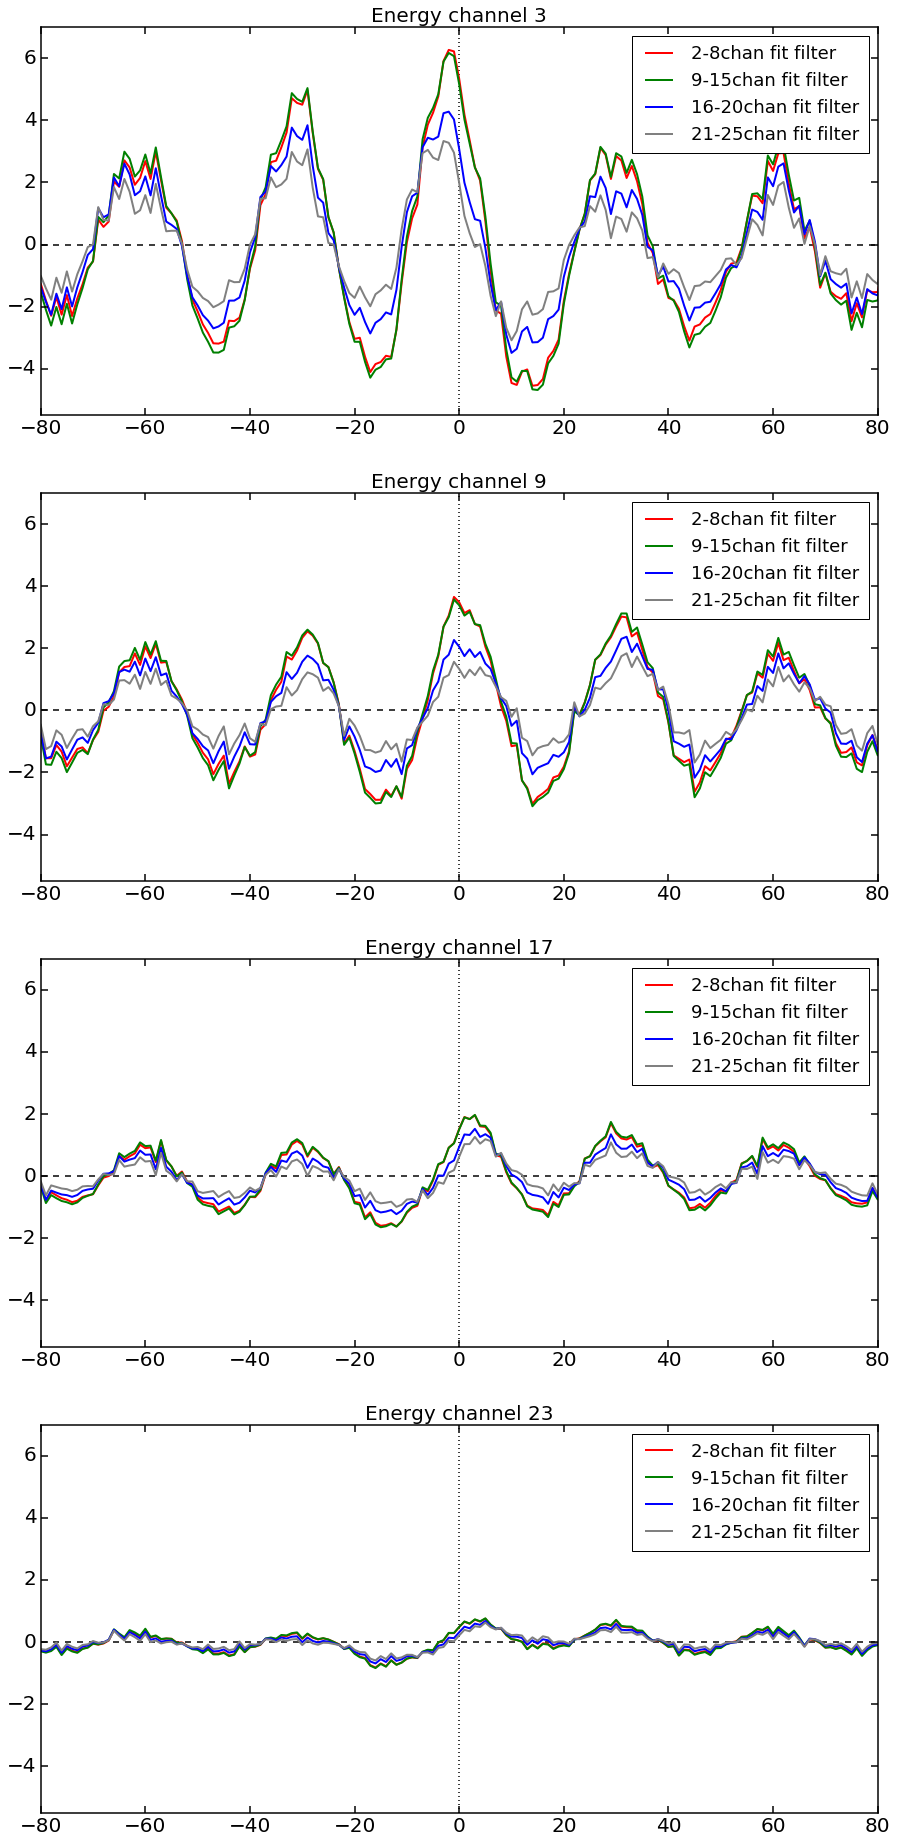

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 32), dpi=300)

ax1.plot(time_bins, ccf_1['CCF'][:,3], lw=2, c='red', label="2-8chan fit filter")
ax1.plot(time_bins, ccf_2['CCF'][:,3], lw=2, c='green', label="9-15chan fit filter")
ax1.plot(time_bins, ccf_3['CCF'][:,3], lw=2, c='blue', label="16-20chan fit filter")
ax1.plot(time_bins, ccf_4['CCF'][:,3], lw=2, c='gray', label="21-25chan fit filter")
ax1.vlines(0.0, -5.5, 7, linestyle='dotted', color='black', lw=1.5)
ax1.hlines(0.0, -t_length, t_length, linestyle='dashed', color='black', lw=1.5)
ax1.set_xlim(-t_length, t_length)
ax1.set_ylim(-5.5, 7)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(which='major', width=1.5, length=7)
ax1.tick_params(which='minor', width=1.5, length=4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='upper right', fontsize=18, borderpad=0.5, labelspacing=0.5, borderaxespad=0.5)
ax1.set_title("Energy channel 3", fontproperties=font_prop)

ax2.plot(time_bins, ccf_1['CCF'][:,9], lw=2, c='red', label="2-8chan fit filter")
ax2.plot(time_bins, ccf_2['CCF'][:,9], lw=2, c='green', label="9-15chan fit filter")
ax2.plot(time_bins, ccf_3['CCF'][:,9], lw=2, c='blue', label="16-20chan fit filter")
ax2.plot(time_bins, ccf_4['CCF'][:,9], lw=2, c='gray', label="21-25chan fit filter")
ax2.vlines(0.0, -5.5, 7, linestyle='dotted', color='black', lw=1.5)
ax2.hlines(0.0, -t_length, t_length, linestyle='dashed', color='black', lw=1.5)
ax2.set_xlim(-t_length, t_length)
ax2.set_ylim(-5.5, 7)
ax2.tick_params(axis='x', labelsize=20)
ax2.tick_params(axis='y', labelsize=20)
ax2.tick_params(which='major', width=1.5, length=7)
ax2.tick_params(which='minor', width=1.5, length=4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax2.spines[axis].set_linewidth(1.5)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, loc='upper right', fontsize=18, borderpad=0.5, labelspacing=0.5, borderaxespad=0.5)
ax2.set_title("Energy channel 9", fontproperties=font_prop)

ax3.plot(time_bins, ccf_1['CCF'][:,17], lw=2, c='red', label="2-8chan fit filter")
ax3.plot(time_bins, ccf_2['CCF'][:,17], lw=2, c='green', label="9-15chan fit filter")
ax3.plot(time_bins, ccf_3['CCF'][:,17], lw=2, c='blue', label="16-20chan fit filter")
ax3.plot(time_bins, ccf_4['CCF'][:,17], lw=2, c='gray', label="21-25chan fit filter")
ax3.vlines(0.0, -5.5, 7, linestyle='dotted', color='black', lw=1.5)
ax3.hlines(0.0, -t_length, t_length, linestyle='dashed', color='black', lw=1.5)
ax3.set_xlim(-t_length, t_length)
ax3.set_ylim(-5.5, 7)
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
ax3.tick_params(which='major', width=1.5, length=7)
ax3.tick_params(which='minor', width=1.5, length=4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax3.spines[axis].set_linewidth(1.5)
handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles, labels, loc='upper right', fontsize=18, borderpad=0.5, labelspacing=0.5, borderaxespad=0.5)
ax3.set_title("Energy channel 17", fontproperties=font_prop)

ax4.plot(time_bins, ccf_1['CCF'][:,23], lw=2, c='red', label="2-8chan fit filter")
ax4.plot(time_bins, ccf_2['CCF'][:,23], lw=2, c='green', label="9-15chan fit filter")
ax4.plot(time_bins, ccf_3['CCF'][:,23], lw=2, c='blue', label="16-20chan fit filter")
ax4.plot(time_bins, ccf_4['CCF'][:,23], lw=2, c='gray', label="21-25chan fit filter")
ax4.vlines(0.0, -5.5, 7, linestyle='dotted', color='black', lw=1.5)
ax4.hlines(0.0, -t_length, t_length, linestyle='dashed', color='black', lw=1.5)
ax4.set_xlim(-t_length, t_length)
ax4.set_ylim(-5.5, 7)
ax4.tick_params(axis='x', labelsize=20)
ax4.tick_params(axis='y', labelsize=20)
ax4.tick_params(which='major', width=1.5, length=7)
ax4.tick_params(which='minor', width=1.5, length=4)
for axis in ['top', 'bottom', 'left', 'right']:
    ax4.spines[axis].set_linewidth(1.5)
handles, labels = ax4.get_legend_handles_labels()
ax4.legend(handles, labels, loc='upper right', fontsize=18, borderpad=0.5, labelspacing=0.5, borderaxespad=0.5)
ax4.set_title("Energy channel 23", fontproperties=font_prop)

plt.show()

In [2]:
infile = "./GX339-BQPO_ref_fund_filt.txt"
filt = np.loadtxt(infile)
n_bins = 8192
in_freq = "./GX339-BQPO_pos_freqs.txt"
freqs = np.loadtxt(in_freq)
ci_infile = "./GX339-BQPO_ci_fund_filt.txt"
ci_filt = np.loadtxt(ci_infile)
print np.shape(ci_filt)
filt_tab = Table()
filt_tab['REF'] = filt[0:n_bins/2+1]
filt_tab['FREQ'] = freqs
filt_tab['CI'] = ci_filt[0:n_bins/2+1,]
print filt_tab

(8192, 64)
       REF              FREQ       CI [64]  
----------------- --------------- ----------
              0.0             0.0 1.0 .. 1.0
 0.00488095755739 0.0140289346778 1.0 .. 1.0
 0.00495899668751 0.0280578693555 1.0 .. 1.0
 0.00507125304007 0.0420868040333 1.0 .. 1.0
 0.00521627705475 0.0561157387111 1.0 .. 1.0
 0.00539194473122 0.0701446733889 1.0 .. 1.0
 0.00559558188434 0.0841736080666 1.0 .. 1.0
 0.00582410777038 0.0982025427444 1.0 .. 1.0
 0.00607418514265  0.112231477422 1.0 .. 1.0
 0.00634236496081    0.1262604121 1.0 .. 1.0
              ...             ...        ...
0.000138155280307   57.3222270934 1.0 .. 1.0
 0.00013808091528   57.3362560281 1.0 .. 1.0
0.000138006610275   57.3502849627 1.0 .. 1.0
0.000137932365227   57.3643138974 1.0 .. 1.0
0.000137858180071   57.3783428321 1.0 .. 1.0
0.000137784054743   57.3923717668 1.0 .. 1.0
0.000137709989179   57.4064007014 1.0 .. 1.0
0.000137635983315   57.4204296361 1.0 .. 1.0
0.000137562037086   57.4344585708 1.0 .. 1.0

In [5]:
continuum_ci3_file = "./GX339-BQPO_ci_chan3_continuum.txt"
fund_ci3_file = "./GX339-BQPO_ci_chan3_fund.txt"
filt_tab['CONTINUUM_3'] = np.loadtxt(continuum_ci3_file)
filt_tab['FUND_3'] = np.loadtxt(fund_ci3_file)

continuum_ci15_file = "./GX339-BQPO_ci_chan15_continuum.txt"
fund_ci15_file = "./GX339-BQPO_ci_chan15_fund.txt"
filt_tab['CONTINUUM_15'] = np.loadtxt(continuum_ci15_file)
filt_tab['FUND_15'] = np.loadtxt(fund_ci15_file)

continuum_ci22_file = "./GX339-BQPO_ci_chan22_continuum.txt"
fund_ci22_file = "./GX339-BQPO_ci_chan22_fund.txt"
filt_tab['CONTINUUM_22'] = np.loadtxt(continuum_ci22_file)
filt_tab['FUND_22'] = np.loadtxt(fund_ci22_file)

continuum_ref_file = "./GX339-BQPO_ref_continuum.txt"
fund_ref_file = "./GX339-BQPO_ref_fund.txt"
filt_tab['CONTINUUM_REF'] = np.loadtxt(continuum_ref_file)
filt_tab['FUND_REF'] = np.loadtxt(fund_ref_file)

In [31]:
print(np.shape(filt_tab['CI']))
print np.argmax(filt_tab['CI'][:,2])
print filt_tab['FREQ'][373]
print filt_tab['REF'][373]
print filt_tab['CI'][373,3]
print filt_tab['CI'][373,9]
print filt_tab['CI'][373,15]
print filt_tab['CI'][373,18]
print filt_tab['CI'][373,22]

(4097, 64)
373
5.23279263481
0.689223832214
0.0747581288196
0.101739446512
0.0740665586935
0.0517875600157
0.0356424503813


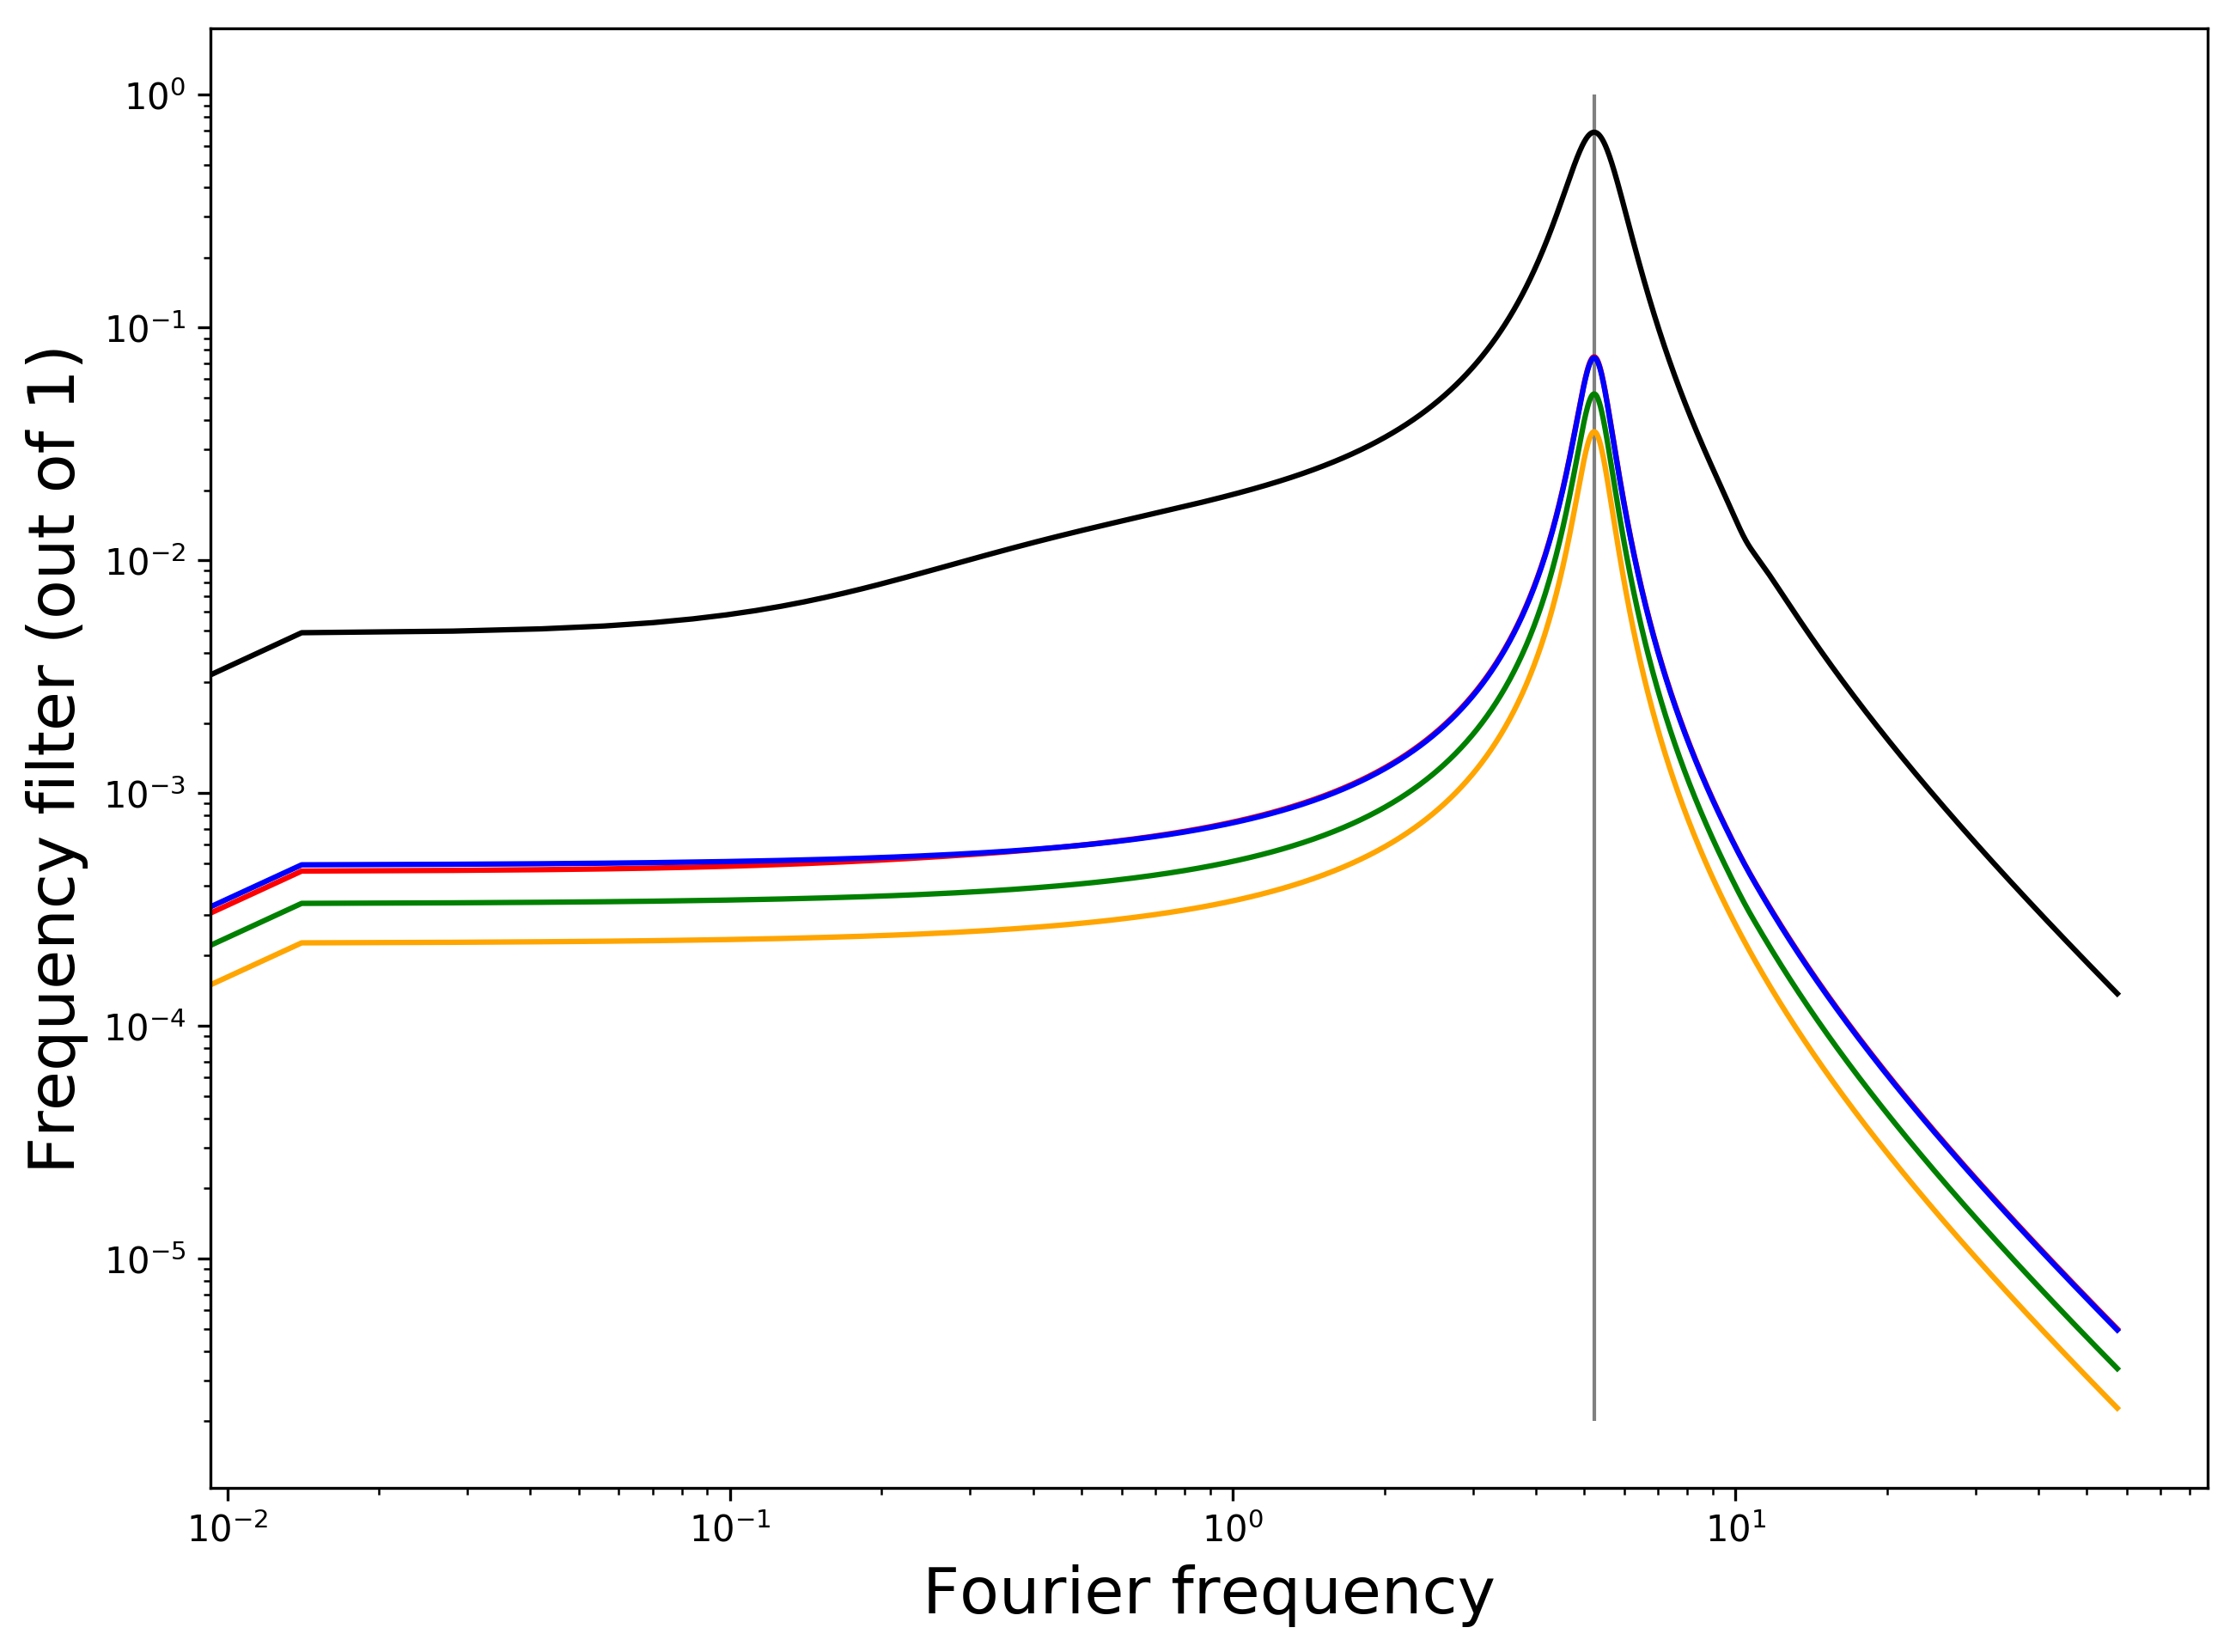

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7.5), dpi=300)
ax.plot(filt_tab['FREQ'], filt_tab['CI'][:,3], color='red')
ax.plot(filt_tab['FREQ'], filt_tab['CI'][:,15], color='blue')
ax.plot(filt_tab['FREQ'], filt_tab['CI'][:,18], color='green')
ax.plot(filt_tab['FREQ'], filt_tab['CI'][:,22], color='orange')
ax.plot(filt_tab['FREQ'], filt_tab['REF'], color='black')
# ax.plot(filt_tab['FREQ'], filt_tab['CONTINUUM_2'])
# ax.plot(filt_tab['FREQ'], filt_tab['FUND_2'])
# ax.plot(filt_tab['FREQ'], filt_tab['CONTINUUM_22'])
# ax.plot(filt_tab['FREQ'], filt_tab['FUND_22'])
# ax.plot(filt_tab['FREQ'], filt_tab['CONTINUUM_REF'])
# ax.plot(filt_tab['FREQ'], filt_tab['FUND_REF'])
ax.vlines(5.23279263481, 2e-6, 1., lw=1, color='gray')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Fourier frequency", fontproperties=font_prop)
ax.set_ylabel("Frequency filter (out of 1)", fontproperties=font_prop)
plt.show()

In [37]:
a = 4.57
phase = np.pi/2
freq = 5.22
t = np.arange(0, 64, 0.0082)

x_t = a * np.sin(freq*t + phase)
tbin = 20
print x_t[20]

2.99519258105


In [40]:
X_f = fftpack.fft(x_t)
X_f_filt = 0.5*X_f
print 
x_t_filt = fftpack.ifft(X_f_filt).real
x_t_unfilt = fftpack.ifft(X_f).real

In [42]:
print x_t_filt[20]
print x_t_unfilt[20]
print x_t_filt[20] / x_t_unfilt[20]

1.49759629052
2.99519258105
0.5
